# Lab session #2
## Data processing, Statistics and Visualisation, Clustering


#### Please enter your firstname and lastname below.

- Firstname: Mahamadi
- Lastname: NIKIEMA

In this assignment, the input is a csv file containing ELI5 posts (question, topics and other miscelleanous  information) which we convert for you into a Pandas dataframe of the form:

![title](data.png)

The assignment involves processing the text, exploratory analysis of the data (statistics and visualisation) and clustering.


## 1 - Data pre-processing (14 points, 2 Bonus points)

**IMPORTANT** Make sure to run the following cell before starting on the exercises.

In [1]:
import pandas as pd
df = pd.read_csv("eli5questions.csv", sep = ",",on_bad_lines='skip')
df.head()

,id,answer,score,topic
0,0,Whoever said that is wrong.The FDA and IWBA ca...,14100.0,Chemistry
1,1,In Europe you have the time of bottling printe...,1400.0,Chemistry
2,2,I’d hate to be “that guy” but I was looking an...,47.0,Chemistry
3,3,I've heard of several studies that conclude th...,195.0,Chemistry
4,4,UV and heat will degrade the material however.,15.0,Chemistry


**Exercice 1.1 (2 points)** 

How many topics and how many instance per topic ?
- Extract from the dataframe the list of possible topics and the number of instances (rows) per topic.

_**Hint**_ Cf. Pandas cheat sheet

In [2]:
# How many topics and how many instance per topic ?
print(f" Number of topic :\n{df['topic'].unique()} \n")

print(f"Instance of topic : \n{df['topic'].value_counts()}")

 Number of topic :
['Chemistry' 'Other' 'Physics'] 

Instance of topic : 
Other        758
Physics      722
Chemistry    690
Name: topic, dtype: int64


- We have 3 topics : Chemistry, Other and Physics
- Chemistry has 690 instances, Other has 758 instances, and Physics has 722 instances 

**Exercise 1.2  (6 points)**

Define a function "preprocessing(text)" which takes as input a string and returns a new, modified string which results from:

 - tokenizing the input string
 - lower casing the resulting tokens
 - removing all tokens that are not made of alphabetical characters (use python isalpha method)
 - converting the resulting list of tokens back into a string (use python join method)

In [3]:
import nltk
from nltk.tokenize import word_tokenize

def preprocessing(texts:str):
    text_ = word_tokenize(texts)
    text_ = " ".join([text.lower() for text in texts.split() if \
                     text.isalpha()])
    return text_

**Exercise 1.3  (2 points)**

- Apply the preprocessing function to the "answer" column of the df dataframe provided  above and store the result into a new dataframe called "clean_answers".
- print out the first 5 rows of this new dataframe 

**Hint**: Use Pandas "apply" and "head" methods

In [4]:
df['clean_answers'] = df['answer'].apply(preprocessing)

In [8]:
print(f"First 5 rows of the new dataframe : \n")
df.head()

First 5 rows of the new dataframe : 



,id,answer,score,topic,clean_answers
0,0,Whoever said that is wrong.The FDA and IWBA ca...,14100.0,Chemistry,whoever said that is fda and iwba find any evi...
1,1,In Europe you have the time of bottling printe...,1400.0,Chemistry,in europe you have the time of bottling printe...
2,2,I’d hate to be “that guy” but I was looking an...,47.0,Chemistry,hate to be but i was looking and no one else h...
3,3,I've heard of several studies that conclude th...,195.0,Chemistry,heard of several studies that conclude that th...
4,4,UV and heat will degrade the material however.,15.0,Chemistry,uv and heat will degrade the material


#### Exercice 1.4 - how much does cleaning reduce the size of the input (2 points) ?

- Compute the number of unique tokens (vocabulary) contained in (i) the "answer" column of the initial dataframe and (ii) the clean_answer dataframe you just created. As the string is very large, feel free to use split to tokenize (rather than a tokenizer)
- Print out both numbers

In [10]:
clean_text = len(set(df['clean_answers'].str.cat(sep =' ').split()))

In [11]:
raw_text = len(set(df['answer'].str.cat(sep =' ').split()))

In [13]:
print(f"Number of tokens before cleaning : \n{raw_text}\n Number of tokens after cleaning :\n {clean_text}")

Number of tokens before cleaning : 
20980
 Number of tokens after cleaning :
 9088


- The cleaning reduces the size of vocabulary from **20980** to **9088**. That is **43,4%** of the initial size !

**Exercise 1.5 (OPTIONAL, 2 BONUS POINTS)**

- Define a function "get_content_words(text)" which takes as input a string and returns the nouns and verbs it contains as a string
- Apply this function to the "answer" column of the df dataframe and store the result into a new dataframe called "cw_df".
- Compute the number of unique tokens contained in (i) the "answer" column of the initial dataframe df and (ii) the content words column of the cw_df dataframe you just created
- Print out both numbers


_**Hints**_ 
- the spacy pos tags for verbs and nouns are 'VERB' and 'NOUN' respectively. 
- str(x) converts x to a string (you might need this when using spacy)

In [14]:
import spacy
nlp = spacy.load("en_core_web_sm")
pos = ['NOUN','VERB']
def get_content_word(texts:str):
    #text_ = " ".join([text.lower() for text in texts.split() if text not in stopword and \
                     #text.isalpha() and len(text) > 2])
    texts = nlp(texts)
    l = [text for text in texts if text.pos_ in pos]
    return str(l)[1:-1]

In [15]:
cw_df = df['answer'].apply(get_content_word)
cw_df = pd.DataFrame(data=cw_df)
cw_df = cw_df.rename(columns={"answer":"content_word"})

In [17]:
answer_tokens = len(set(df['answer'].str.cat(sep =' ').split()))
cw_tokens = len(set(cw_df['content_word'].str.cat(sep =' ').split()))

In [23]:
print(f"Number of unique tokens before cleaning : \n{answer_tokens}\n\
      Number of unique tokens for content word :\n {cw_tokens}")

Number of unique tokens before cleaning : 
20980
      Number of unique tokens for content word :
 10162


- The number of unique tokens is **10162**. It is high than the cleaned text (10162 for the content word and 9088 for the cleaned text. The difference may come from the difference of tokenization process between **spacy** and **nltk**

#### Exercise 1.6: Create training data for the clustering exercise  (2 points) 

- Extract the topic column of the df dataframe 
- Create a new dataframe called "data_df" containing columns  for 

 - the cleaned up answers
 - the topics of each answer
 - content words (if you have computed them for the BONUS point questions)
 
**Hint**: Use pandas concat method


The output should be something like this if you did the bonus questions, else it will only contain the clean answers and the topic column:

![title](x1.6.png)


In [24]:
data_df = pd.concat([df[["clean_answers", "topic"]],
                     cw_df], axis = 1)

In [25]:
data_df.head()

,clean_answers,topic,content_word
0,whoever said that is fda and iwba find any evi...,Chemistry,"said, find, evidence, age, matters, water, bot..."
1,in europe you have the time of bottling printe...,Chemistry,"have, time, bottling, printed, bottle, way, fi..."
2,hate to be but i was looking and no one else h...,Chemistry,"’d, hate, guy, looking, one, chimed, bought, h..."
3,heard of several studies that conclude that th...,Chemistry,"heard, studies, conclude, bottles, leach, chem..."
4,uv and heat will degrade the material,Chemistry,"UV, heat, degrade, material"


## 2 - Statistics and Visualisation (6 points)

#### Exercise 2.1  (4 points) 

- Define a function "tokenize_and_count" which takes as input a string, tokenizes it and returns the number of tokens produced.
- Apply this function to the "answer" content of the data_df dataframe created in Exercise 1.3 and update data_df with the results.   
data_df should now contain 3 columns with headers "answer", "topic" and "nb_tokens".

The output should be something like this (or only the columns clean answers, topic and nb_tokens if did not do the bonus questions):

![title](x2.1.png)


In [26]:
def tokenize_and_count(texts:str):
    text_ = word_tokenize(texts)
    return len(text_)

In [27]:
data_df['nb_tokens'] = data_df['clean_answers'].apply(tokenize_and_count)
data_df['nb_cw'] = data_df['content_word'].apply(tokenize_and_count)

In [28]:
data_df.head()

,clean_answers,topic,content_word,nb_tokens,nb_cw
0,whoever said that is fda and iwba find any evi...,Chemistry,"said, find, evidence, age, matters, water, bot...",122,117
1,in europe you have the time of bottling printe...,Chemistry,"have, time, bottling, printed, bottle, way, fi...",26,19
2,hate to be but i was looking and no one else h...,Chemistry,"’d, hate, guy, looking, one, chimed, bought, h...",37,38
3,heard of several studies that conclude that th...,Chemistry,"heard, studies, conclude, bottles, leach, chem...",51,41
4,uv and heat will degrade the material,Chemistry,"UV, heat, degrade, material",7,7


#### Exercise 2.2  (2 points) 

Plot the histogram of number of tokens

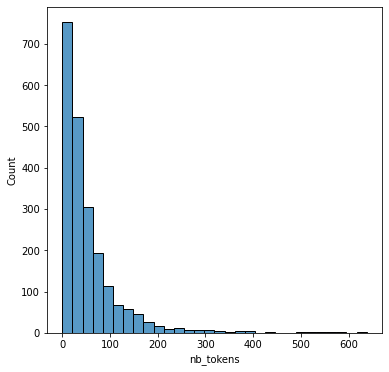

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(6,6))
sns.histplot(data= data_df, x='nb_tokens', bins= 30);

- Most of the answers have some number of tokens less than **100**

## 3 - Clustering (10 points)

#### Exercise 3.1  (2 points) 

Use sklearn [TfidfVectorizer]( https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) method to turn the clean answers (or the content words) into a TF-IDF matrix where each row represents an answer, the columns are tokens and the cell contains the tf-idf score of each token.

* Import the TfidfVectorizer method from sklearn
* Create a tf-idf vectorizer. The maximum nb of features should be set to 8000. Set use_idf to True, stop_words to "english" and the tokenizer to nltk.word_tokenize.
* set 
* Apply the tfidf_vectorizer.fit_transform method to the clean answers (extract these from the data_df dataframe created in Exercise 1.6) 

In [32]:
X = data_df['clean_answers']
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True,
                            stop_words='english',
                             max_features=8000,
                            tokenizer=nltk.word_tokenize)
X_vec = vectorizer.fit_transform(X)

- Here **clean_answers** will be used as features

#### Exercise 3.2 Training a K-means clustering model  (2 points) 

* Create a K-means object (import KMeans from sklearn.cluster)
* train this object on the tf-idf matrix you created from the data (use the kmeans fit method)

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5) 
cluster = kmeans.fit(X_vec)

-The number of cluster chosen is **5**, default from sklearn

#### Exercise 3.3 Print out the top terms of each clusters  (4 points) 

In [35]:
centroid = cluster.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
k = 5
for i in range(k):
    print("Cluster %d:" % i),
    for ind in centroid[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 water
 ice
 salt
 liquid
 just
 actually
 oil
 soap
 use
 pressure
Cluster 1:
 energy
 light
 heat
 like
 object
 explain
 just
 feel
 mass
 gravity
Cluster 2:
 like
 just
 good
 know
 really
 people
 does
 air
 use
 actually
Cluster 3:
 thank
 makes
 concise
 understand
 cool
 brilliant
 wonderful
 bringing
 curious
 analogy
Cluster 4:
 solid
 linear
 auto
 ease
 infinite
 label
 sense
 deal
 great
 people


- **10** top terms is printed for each cluster
- For **cluster_0**, the 10 top terms seems to related to some liquids like water, oil, salt. That may come from chemestry.
- For **cluster_1**, the 10 top terms are mostly related to physics terms such as energy, light etc
- For **cluster_2**, many of the 10 top terms are mostly related to some comparison terms used in these fields
- For **cluster_3**, terms seems to come from results and conclusion 
- For **cluster_4**, we find many terms related to the physics domain like solid, infinite, linear

#### Exercise 3.4 Evaluate the clusters  (2 points) 

* Import metrics from sklearns and compute homogeneity, completeness, v_measure, adjusted rand index and silhouette coefficient
* Print each score out

**Hint**: the metrics methods (homogeneity_score, completeness_score etc.) take as input the list of true labels (Y) and the list of predicted labels which you can get using kmeans labels_ attribute on the clustering model you have learned in the previous exercise (e.g., km.labels_ if you've called your model km).

In [37]:
df_cluster = pd.concat([data_df.drop(['nb_tokens', 'nb_cw'],axis = 1), 
                        pd.DataFrame(cluster.labels_, columns = ['clusters'])], axis =1)

In [38]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score
print(f"Homogeneity : {homogeneity_score(df_cluster['clean_answers'], df_cluster['clusters'])}")
print(f"Completeness : {completeness_score(df_cluster['clean_answers'], df_cluster['clusters'])}")
print(f"V_measure : {v_measure_score(df_cluster['clean_answers'], df_cluster['clusters'])}")
print(f"Adjusted_rand_score : {adjusted_rand_score(df_cluster['clean_answers'], df_cluster['clusters'])}")

Homogeneity : 0.08923623815940307
Completeness : 1.0000000000000004
V_measure : 0.16385102704661192
Adjusted_rand_score : 4.520756750884104e-05


#### Visualising the clusters (PROVIDED)

You might need to adjust the variables to fit your code

KeyError: 3

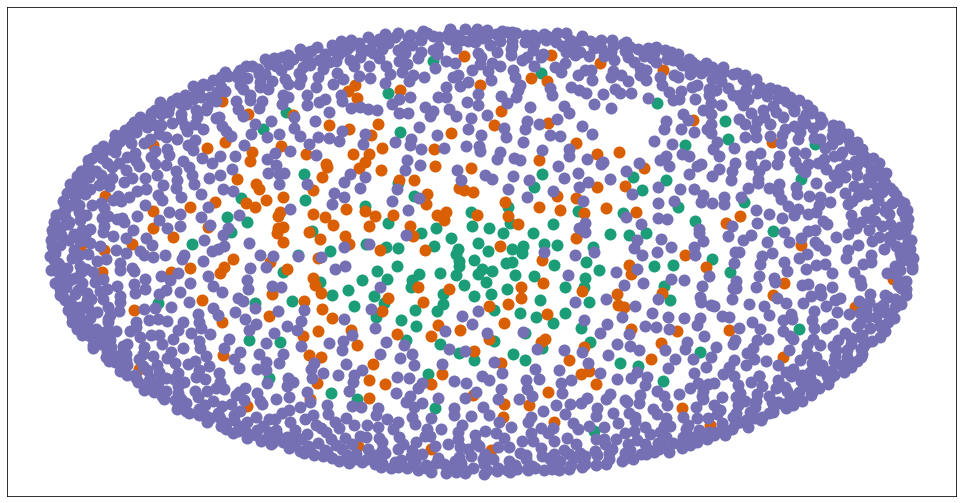

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(X_vec)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

#set up cluster names
cluster_names = {0: 'Other', 1: 'Chemistry', 2: 'Physics'}

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=kmeans.labels_.tolist()))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], 
            color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)
    
ax.legend(numpoints=1)
plt.show()

- The visualisation shows some clusters very well, but some non-linear transformation like **TSNE** may group well the clusters